In [1]:
import os
####*IMPORANT*: Have to do this line *before* importing tensorflow
os.environ['PYTHONHASHSEED']=str(1)

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers 
import random
import pandas as pd
import numpy as np
from tensorflow.keras.layers import  Dropout
from tensorflow.keras import optimizers
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import Dropout

In [2]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [3]:
#df=read_csv("C:/Users/Amina Lawal/Desktop/Synthetic/WC/Epoch199MixUp.csv")
df= read_csv('C:/Users/Amina Lawal/Documents/My Thesis/Original_DatasetFiles/KZNDailySales.csv', header=0, index_col=0)

values=df.values
values = values.astype('float32')


# normalize features
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled = scaler.fit_transform(values)
    
# specify the number of lag hours
n_hours = 5
n_features = 9
    
# frame as supervised learning
reframed = series_to_supervised(values, n_hours, 1)
    
# split into train and test sets
values = reframed.values

#Split into train and test set
n_train_hours = int(values.shape[0]*0.7)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]


In [4]:
numberOfParents =80 #number of parents to start
numberOfParentsMating = 2 #number of parents that will mate
numberOfParameters = 10 #number of parameters that will be optimized
numberOfGenerations =100  #number of genration that will be created
#previous=500
#threshold=57

In [5]:
import LSTM_Evolution

In [6]:
#initialize population
population=LSTM_Evolution.init_poplulation(numberOfParents)
population

array([[ 16,   0,  24,   0,  50,   1,  50, 120,  32,   1],
       [ 12,   1,   6,   1,  32,   0, 100,  70,  18,   1],
       [100,   0,  28,   0,   6,   0, 100, 100,   4,   0],
       [ 18,   1,   6,   0,  50,   1,  64,  50,  18,   1],
       [ 18,   1,  24,   0,  32,   0,  16, 120,  18,   1],
       [ 28,   1,  64,   0,  24,   1,  64,  70,  64,   0],
       [100,   0,  50,   0,  32,   1, 100,  50,  18,   0],
       [ 12,   1,  64,   0,  16,   1,  32,  70,   4,   0],
       [  6,   1, 100,   1,  16,   0,  64,  50,   4,   1],
       [ 64,   0,  32,   1, 100,   1,  50,  60,  64,   1],
       [ 32,   0,  64,   0,  32,   0,  50, 150,  18,   1],
       [ 64,   1,  50,   1,  32,   1,  10, 100,  64,   0],
       [ 50,   0,  18,   0,  64,   0, 128,  40,  64,   0],
       [  6,   0,  12,   0,  50,   0, 128, 150,  18,   1],
       [ 24,   0, 100,   0,  28,   1,  10,  50,  16,   0],
       [ 64,   0,  24,   1,  50,   1,  50,  70,   4,   1],
       [ 24,   1,  28,   1,  18,   1,  10,  60,  64,   1

In [7]:
fitnessValue = LSTM_Evolution.CalculateFitness(population, train_X, train_y,test_X, test_y, n_hours, n_features)

In [8]:
fitnessValue

[52.910550622607396,
 51.646820260000034,
 56.49020976087914,
 54.71444648625146,
 52.26940849534386,
 51.93204929656277,
 57.28508792720951,
 81.84323393785371,
 55.84497629109645,
 52.16079266092134,
 51.93670558207124,
 52.228034408016924,
 51.88872182974832,
 52.9967431561247,
 56.09353890976995,
 59.58629549928511,
 52.147559098407235,
 51.563551125649795,
 57.3737957730378,
 53.18369918852016,
 52.78236473808037,
 54.06113844022455,
 57.12508761276104,
 53.413337464912495,
 52.703085624799996,
 52.64332649271653,
 52.66699398920898,
 51.52647178802246,
 52.19835216508276,
 53.18354770127459,
 51.87772959686073,
 52.3783071561775,
 59.17026172873393,
 49.16679549550565,
 52.605144896019915,
 57.41408110371858,
 52.1996851418306,
 50.91355361204175,
 53.63747760573991,
 53.34524657390994,
 53.48748804115898,
 60.47526814029538,
 51.41218145871414,
 51.44978447248953,
 53.0318139517745,
 52.21980895470248,
 51.583712492716636,
 55.31571097671416,
 61.738673603822875,
 54.27804304717

In [9]:
#define an array to store the fitness  hitory
fitnessHistory = np.empty([numberOfGenerations+1, numberOfParents])

#insert the value of initial parameters of fitness history
fitnessHistory[0, :] = fitnessValue

#define an array to store the value of each parameter for each parent and generation
populationHistory = np.empty([(numberOfGenerations+1)*numberOfParents, numberOfParameters])

#insert the value of initial parameters to history
populationHistory[0:numberOfParents, :] = population

In [10]:
for generation in range(numberOfGenerations):
    
    print("This is number %s generation" % (generation))
    
    print("------------fitness values-------------------")
    print(fitnessValue)
    
    #best score in the current iteration
    print('Best RMSE score in the this iteration = {}'.format(np.min(fitnessHistory[generation, :]))) # we can add a condition to break heare

    #survival of the fittest - take the top parents, based on the fitness value and number of parents needed to be selected
    parents = LSTM_Evolution.new_parents_selection(population=population, fitness=fitnessValue, numParents=numberOfParentsMating)
    print('----------------Best parents---------------------')
    print(parents)
    
    #mate these parents to create children having parameters from these parents (we are using uniform crossover)
    children = LSTM_Evolution.crossover_uniform(parents=parents, numberOfParameters=10, NumChild=1)
    
    print('---------crossover------------')
    print(children)
    
    #add mutation to create genetic diversity
    children_mutated = LSTM_Evolution.Single_mutation(children,numberOfParameters)
    
    '''
    We will create new population, in which n children will replace the worst n parents based on the
    fitness score and rest of them  will be children
    '''
    
    poulation,childIndex =LSTM_Evolution.parents_replacement(population=population, fitness=fitnessValue, numParents=1, Children=children_mutated)
    
    #Update fitnessValues
    
    fitnessValue = LSTM_Evolution.UpdateFitnessValues(population, childIndex,fitnessValue,train_X=train_X, train_y=train_y,test_X=test_X, test_y=test_y, n_hours=5, n_features=9)
    
    print("---------------updated fitness Value---------------------------")
    print(fitnessValue)
    
    fitnessHistory[(generation+1), :] = fitnessValue
    
    populationHistory[(generation+1)*numberOfParents : (generation+1)*numberOfParents+ numberOfParents , :] = population #srore parent information
    

This is number 0 generation
------------fitness values-------------------
[52.910550622607396, 51.646820260000034, 56.49020976087914, 54.71444648625146, 52.26940849534386, 51.93204929656277, 57.28508792720951, 81.84323393785371, 55.84497629109645, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 52.9967431561247, 56.09353890976995, 59.58629549928511, 52.147559098407235, 51.563551125649795, 57.3737957730378, 53.18369918852016, 52.78236473808037, 54.06113844022455, 57.12508761276104, 53.413337464912495, 52.703085624799996, 52.64332649271653, 52.66699398920898, 51.52647178802246, 52.19835216508276, 53.18354770127459, 51.87772959686073, 52.3783071561775, 59.17026172873393, 49.16679549550565, 52.605144896019915, 57.41408110371858, 52.1996851418306, 50.91355361204175, 53.63747760573991, 53.34524657390994, 53.48748804115898, 60.47526814029538, 51.41218145871414, 51.44978447248953, 53.0318139517745, 52.21980895470248, 51.583712492716636, 55.31571097671416, 61.738673

this is the child rmse 51.992027258393186
---------------updated fitness Value---------------------------
[52.910550622607396, 51.646820260000034, 56.49020976087914, 54.71444648625146, 52.26940849534386, 51.93204929656277, 57.28508792720951, 46.48589545832693, 55.84497629109645, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 52.9967431561247, 56.09353890976995, 59.58629549928511, 52.147559098407235, 51.563551125649795, 57.3737957730378, 53.18369918852016, 52.78236473808037, 54.06113844022455, 57.12508761276104, 53.413337464912495, 52.703085624799996, 52.64332649271653, 52.66699398920898, 51.52647178802246, 52.19835216508276, 53.18354770127459, 51.87772959686073, 52.3783071561775, 59.17026172873393, 49.16679549550565, 52.605144896019915, 57.41408110371858, 52.1996851418306, 50.91355361204175, 53.63747760573991, 53.34524657390994, 53.48748804115898, 60.47526814029538, 51.41218145871414, 51.44978447248953, 53.0318139517745, 52.21980895470248, 51.5837124927166

this is the child rmse 53.80407209336599
---------------updated fitness Value---------------------------
[52.910550622607396, 51.646820260000034, 56.49020976087914, 54.71444648625146, 52.26940849534386, 51.93204929656277, 57.28508792720951, 46.48589545832693, 55.84497629109645, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 52.9967431561247, 56.09353890976995, 59.58629549928511, 52.147559098407235, 51.563551125649795, 57.3737957730378, 53.18369918852016, 52.78236473808037, 54.06113844022455, 57.12508761276104, 53.413337464912495, 52.703085624799996, 52.64332649271653, 52.66699398920898, 51.52647178802246, 52.19835216508276, 53.18354770127459, 51.87772959686073, 52.3783071561775, 59.17026172873393, 49.16679549550565, 52.605144896019915, 57.41408110371858, 52.1996851418306, 50.91355361204175, 53.63747760573991, 53.34524657390994, 53.48748804115898, 60.47526814029538, 51.41218145871414, 51.44978447248953, 53.0318139517745, 52.21980895470248, 51.58371249271663

this is the child rmse 49.7903858142438
---------------updated fitness Value---------------------------
[52.910550622607396, 51.646820260000034, 56.49020976087914, 54.71444648625146, 52.26940849534386, 51.93204929656277, 57.28508792720951, 46.48589545832693, 55.84497629109645, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 52.9967431561247, 56.09353890976995, 59.58629549928511, 52.147559098407235, 51.563551125649795, 57.3737957730378, 53.18369918852016, 52.78236473808037, 54.06113844022455, 57.12508761276104, 53.413337464912495, 52.703085624799996, 52.64332649271653, 52.66699398920898, 51.52647178802246, 52.19835216508276, 53.18354770127459, 51.87772959686073, 52.3783071561775, 59.17026172873393, 49.16679549550565, 52.605144896019915, 57.41408110371858, 52.1996851418306, 50.91355361204175, 53.63747760573991, 53.34524657390994, 53.48748804115898, 50.95510623639696, 51.41218145871414, 51.44978447248953, 53.0318139517745, 52.21980895470248, 51.583712492716636

this is the child rmse 51.07774261863601
---------------updated fitness Value---------------------------
[52.910550622607396, 51.646820260000034, 56.49020976087914, 54.71444648625146, 52.26940849534386, 51.93204929656277, 57.28508792720951, 46.48589545832693, 55.84497629109645, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 52.9967431561247, 56.09353890976995, 49.16082156507481, 52.147559098407235, 51.563551125649795, 57.3737957730378, 53.18369918852016, 52.78236473808037, 54.06113844022455, 57.12508761276104, 53.413337464912495, 52.703085624799996, 52.64332649271653, 52.66699398920898, 51.52647178802246, 52.19835216508276, 53.18354770127459, 51.87772959686073, 52.3783071561775, 50.730539584005754, 49.16679549550565, 52.605144896019915, 57.41408110371858, 52.1996851418306, 50.91355361204175, 53.63747760573991, 53.34524657390994, 53.48748804115898, 50.95510623639696, 51.41218145871414, 51.44978447248953, 53.0318139517745, 52.21980895470248, 51.5837124927166

this is the child rmse 49.16082156507481
---------------updated fitness Value---------------------------
[52.910550622607396, 51.646820260000034, 56.49020976087914, 54.71444648625146, 52.26940849534386, 51.93204929656277, 57.28508792720951, 46.48589545832693, 55.84497629109645, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 52.9967431561247, 56.09353890976995, 49.16082156507481, 52.147559098407235, 51.563551125649795, 57.3737957730378, 53.18369918852016, 52.78236473808037, 54.06113844022455, 57.12508761276104, 53.413337464912495, 52.703085624799996, 52.64332649271653, 52.66699398920898, 51.52647178802246, 52.19835216508276, 53.18354770127459, 51.87772959686073, 52.3783071561775, 50.730539584005754, 49.16679549550565, 52.605144896019915, 49.16082156507481, 52.1996851418306, 50.91355361204175, 53.63747760573991, 53.34524657390994, 53.48748804115898, 50.95510623639696, 51.41218145871414, 51.44978447248953, 53.0318139517745, 52.21980895470248, 51.5837124927166

this is the child rmse 52.44293075647208
---------------updated fitness Value---------------------------
[52.910550622607396, 51.646820260000034, 56.49020976087914, 54.71444648625146, 52.26940849534386, 51.93204929656277, 52.44293075647208, 46.48589545832693, 55.84497629109645, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 52.9967431561247, 56.09353890976995, 49.16082156507481, 52.147559098407235, 51.563551125649795, 46.48589545832693, 53.18369918852016, 52.78236473808037, 54.06113844022455, 57.12508761276104, 53.413337464912495, 52.703085624799996, 52.64332649271653, 52.66699398920898, 51.52647178802246, 52.19835216508276, 53.18354770127459, 51.87772959686073, 52.3783071561775, 50.730539584005754, 49.16679549550565, 52.605144896019915, 49.16082156507481, 52.1996851418306, 50.91355361204175, 53.63747760573991, 53.34524657390994, 53.48748804115898, 50.95510623639696, 51.41218145871414, 51.44978447248953, 53.0318139517745, 52.21980895470248, 51.583712492716

this is the child rmse 46.48589545832693
---------------updated fitness Value---------------------------
[52.910550622607396, 51.646820260000034, 46.48589545832693, 54.71444648625146, 52.26940849534386, 51.93204929656277, 52.44293075647208, 46.48589545832693, 55.84497629109645, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 52.9967431561247, 56.09353890976995, 49.16082156507481, 52.147559098407235, 51.563551125649795, 46.48589545832693, 53.18369918852016, 52.78236473808037, 54.06113844022455, 46.48589545832693, 53.413337464912495, 52.703085624799996, 52.64332649271653, 52.66699398920898, 51.52647178802246, 52.19835216508276, 53.18354770127459, 51.87772959686073, 52.3783071561775, 50.730539584005754, 49.16679549550565, 52.605144896019915, 49.16082156507481, 52.1996851418306, 50.91355361204175, 53.63747760573991, 53.34524657390994, 53.48748804115898, 50.95510623639696, 51.41218145871414, 51.44978447248953, 53.0318139517745, 52.21980895470248, 51.583712492716

this is the child rmse 49.16082156507481
---------------updated fitness Value---------------------------
[52.910550622607396, 51.646820260000034, 46.48589545832693, 54.71444648625146, 52.26940849534386, 51.93204929656277, 52.44293075647208, 46.48589545832693, 55.84497629109645, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 52.9967431561247, 49.16082156507481, 49.16082156507481, 52.147559098407235, 51.563551125649795, 46.48589545832693, 53.18369918852016, 52.78236473808037, 54.06113844022455, 46.48589545832693, 53.413337464912495, 52.703085624799996, 52.64332649271653, 52.66699398920898, 51.52647178802246, 52.19835216508276, 53.18354770127459, 51.87772959686073, 52.3783071561775, 50.730539584005754, 49.16679549550565, 52.605144896019915, 49.16082156507481, 52.1996851418306, 50.91355361204175, 53.63747760573991, 53.34524657390994, 53.48748804115898, 50.95510623639696, 51.41218145871414, 51.44978447248953, 53.0318139517745, 52.21980895470248, 51.583712492716

this is the child rmse 57.27928512041897
---------------updated fitness Value---------------------------
[52.910550622607396, 51.646820260000034, 46.48589545832693, 54.71444648625146, 52.26940849534386, 51.93204929656277, 52.44293075647208, 46.48589545832693, 53.078398678275896, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 52.9967431561247, 49.16082156507481, 49.16082156507481, 52.147559098407235, 51.563551125649795, 46.48589545832693, 53.18369918852016, 52.78236473808037, 54.06113844022455, 46.48589545832693, 53.413337464912495, 52.703085624799996, 52.64332649271653, 52.66699398920898, 51.52647178802246, 52.19835216508276, 53.18354770127459, 51.87772959686073, 52.3783071561775, 50.730539584005754, 49.16679549550565, 52.605144896019915, 49.16082156507481, 52.1996851418306, 50.91355361204175, 53.63747760573991, 53.34524657390994, 53.48748804115898, 50.95510623639696, 51.41218145871414, 51.44978447248953, 53.0318139517745, 52.21980895470248, 51.58371249271

this is the child rmse 47.279941013770575
---------------updated fitness Value---------------------------
[52.910550622607396, 51.646820260000034, 46.48589545832693, 46.48589545832693, 52.26940849534386, 51.93204929656277, 52.44293075647208, 46.48589545832693, 53.078398678275896, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 52.9967431561247, 49.16082156507481, 49.16082156507481, 52.147559098407235, 51.563551125649795, 46.48589545832693, 53.18369918852016, 52.78236473808037, 54.06113844022455, 46.48589545832693, 53.413337464912495, 52.703085624799996, 52.64332649271653, 52.66699398920898, 51.52647178802246, 52.19835216508276, 53.18354770127459, 51.87772959686073, 52.3783071561775, 50.730539584005754, 49.16679549550565, 52.605144896019915, 49.16082156507481, 52.1996851418306, 50.91355361204175, 53.63747760573991, 53.34524657390994, 53.48748804115898, 50.95510623639696, 51.41218145871414, 51.44978447248953, 53.0318139517745, 52.21980895470248, 51.5837124927

this is the child rmse 60.5781794073782
---------------updated fitness Value---------------------------
[52.910550622607396, 51.646820260000034, 46.48589545832693, 46.48589545832693, 52.26940849534386, 51.93204929656277, 52.44293075647208, 46.48589545832693, 53.078398678275896, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 52.9967431561247, 49.16082156507481, 49.16082156507481, 52.147559098407235, 51.563551125649795, 46.48589545832693, 53.18369918852016, 52.78236473808037, 60.5781794073782, 46.48589545832693, 53.413337464912495, 52.703085624799996, 52.64332649271653, 52.66699398920898, 51.52647178802246, 52.19835216508276, 53.18354770127459, 51.87772959686073, 52.3783071561775, 50.730539584005754, 49.16679549550565, 52.605144896019915, 49.16082156507481, 52.1996851418306, 50.91355361204175, 53.63747760573991, 53.34524657390994, 53.48748804115898, 50.95510623639696, 51.41218145871414, 51.44978447248953, 53.0318139517745, 52.21980895470248, 51.5837124927166

this is the child rmse 50.73689408975484
---------------updated fitness Value---------------------------
[52.910550622607396, 51.646820260000034, 46.48589545832693, 46.48589545832693, 52.26940849534386, 51.93204929656277, 52.44293075647208, 46.48589545832693, 53.078398678275896, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 52.9967431561247, 49.16082156507481, 49.16082156507481, 52.147559098407235, 51.563551125649795, 46.48589545832693, 53.18369918852016, 52.78236473808037, 46.48589545832693, 46.48589545832693, 53.413337464912495, 52.703085624799996, 52.64332649271653, 52.66699398920898, 51.52647178802246, 52.19835216508276, 53.18354770127459, 51.87772959686073, 52.3783071561775, 50.730539584005754, 49.16679549550565, 52.605144896019915, 49.16082156507481, 52.1996851418306, 50.91355361204175, 53.63747760573991, 53.34524657390994, 53.48748804115898, 50.95510623639696, 51.41218145871414, 51.44978447248953, 53.0318139517745, 52.21980895470248, 51.58371249271

this is the child rmse 48.239962625821185
---------------updated fitness Value---------------------------
[52.910550622607396, 51.646820260000034, 46.48589545832693, 46.48589545832693, 52.26940849534386, 51.93204929656277, 52.44293075647208, 46.48589545832693, 53.078398678275896, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 52.9967431561247, 49.16082156507481, 49.16082156507481, 52.147559098407235, 51.563551125649795, 46.48589545832693, 53.18369918852016, 52.78236473808037, 46.48589545832693, 46.48589545832693, 53.413337464912495, 52.703085624799996, 52.64332649271653, 52.66699398920898, 51.52647178802246, 52.19835216508276, 53.18354770127459, 51.87772959686073, 52.3783071561775, 50.730539584005754, 49.16679549550565, 52.605144896019915, 49.16082156507481, 52.1996851418306, 50.91355361204175, 53.63747760573991, 53.34524657390994, 53.48748804115898, 50.95510623639696, 51.41218145871414, 51.44978447248953, 53.0318139517745, 52.21980895470248, 51.5837124927

this is the child rmse 50.026079624313205
---------------updated fitness Value---------------------------
[52.910550622607396, 51.646820260000034, 46.48589545832693, 46.48589545832693, 52.26940849534386, 51.93204929656277, 52.44293075647208, 46.48589545832693, 53.078398678275896, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 52.9967431561247, 49.16082156507481, 49.16082156507481, 52.147559098407235, 51.563551125649795, 46.48589545832693, 53.18369918852016, 52.78236473808037, 46.48589545832693, 46.48589545832693, 50.026079624313205, 52.703085624799996, 52.64332649271653, 52.66699398920898, 51.52647178802246, 52.19835216508276, 53.18354770127459, 51.87772959686073, 52.3783071561775, 50.730539584005754, 49.16679549550565, 52.605144896019915, 49.16082156507481, 52.1996851418306, 50.91355361204175, 52.88439771316654, 53.34524657390994, 49.320301981030084, 50.95510623639696, 51.41218145871414, 51.44978447248953, 53.0318139517745, 52.21980895470248, 51.583712492

this is the child rmse 46.48589545832693
---------------updated fitness Value---------------------------
[52.910550622607396, 51.646820260000034, 46.48589545832693, 46.48589545832693, 52.26940849534386, 51.93204929656277, 52.44293075647208, 46.48589545832693, 53.078398678275896, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 52.9967431561247, 49.16082156507481, 49.16082156507481, 52.147559098407235, 51.563551125649795, 46.48589545832693, 46.48589545832693, 52.78236473808037, 46.48589545832693, 46.48589545832693, 50.026079624313205, 52.703085624799996, 52.64332649271653, 52.66699398920898, 51.52647178802246, 52.19835216508276, 53.18354770127459, 51.87772959686073, 52.3783071561775, 50.730539584005754, 49.16679549550565, 52.605144896019915, 49.16082156507481, 52.1996851418306, 50.91355361204175, 52.88439771316654, 50.105525849981106, 49.320301981030084, 50.95510623639696, 51.41218145871414, 51.44978447248953, 53.0318139517745, 52.21980895470248, 51.583712492

this is the child rmse 46.48589545832693
---------------updated fitness Value---------------------------
[52.910550622607396, 51.646820260000034, 46.48589545832693, 46.48589545832693, 52.26940849534386, 51.93204929656277, 52.44293075647208, 46.48589545832693, 46.48589545832693, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 52.9967431561247, 49.16082156507481, 49.16082156507481, 52.147559098407235, 51.563551125649795, 46.48589545832693, 46.48589545832693, 52.78236473808037, 46.48589545832693, 46.48589545832693, 50.026079624313205, 52.703085624799996, 52.64332649271653, 52.66699398920898, 51.52647178802246, 52.19835216508276, 48.610068100169585, 51.87772959686073, 52.3783071561775, 50.730539584005754, 49.16679549550565, 52.605144896019915, 49.16082156507481, 52.1996851418306, 50.91355361204175, 52.88439771316654, 50.105525849981106, 49.320301981030084, 50.95510623639696, 51.41218145871414, 51.44978447248953, 53.0318139517745, 52.21980895470248, 51.583712492

this is the child rmse 47.49051097653614
---------------updated fitness Value---------------------------
[52.910550622607396, 51.646820260000034, 46.48589545832693, 46.48589545832693, 52.26940849534386, 51.93204929656277, 52.44293075647208, 46.48589545832693, 46.48589545832693, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 47.49051097653614, 49.16082156507481, 49.16082156507481, 52.147559098407235, 51.563551125649795, 46.48589545832693, 46.48589545832693, 52.78236473808037, 46.48589545832693, 46.48589545832693, 50.026079624313205, 52.703085624799996, 52.64332649271653, 52.66699398920898, 51.52647178802246, 52.19835216508276, 48.610068100169585, 51.87772959686073, 52.3783071561775, 50.730539584005754, 49.16679549550565, 52.605144896019915, 49.16082156507481, 52.1996851418306, 50.91355361204175, 52.88439771316654, 50.105525849981106, 49.320301981030084, 50.95510623639696, 51.41218145871414, 51.44978447248953, 49.633761230701126, 52.21980895470248, 51.583712

this is the child rmse 46.382130200683164
---------------updated fitness Value---------------------------
[46.382130200683164, 51.646820260000034, 46.48589545832693, 46.48589545832693, 52.26940849534386, 51.93204929656277, 52.44293075647208, 46.48589545832693, 46.48589545832693, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 47.49051097653614, 49.16082156507481, 49.16082156507481, 52.147559098407235, 51.563551125649795, 46.48589545832693, 46.48589545832693, 52.78236473808037, 46.48589545832693, 46.48589545832693, 50.026079624313205, 52.703085624799996, 52.64332649271653, 52.66699398920898, 51.52647178802246, 52.19835216508276, 48.610068100169585, 51.87772959686073, 52.3783071561775, 50.730539584005754, 49.16679549550565, 52.605144896019915, 49.16082156507481, 52.1996851418306, 50.91355361204175, 52.88439771316654, 50.105525849981106, 49.320301981030084, 50.95510623639696, 51.41218145871414, 51.44978447248953, 49.633761230701126, 52.21980895470248, 51.58371

this is the child rmse 55.82677588980041
---------------updated fitness Value---------------------------
[46.382130200683164, 51.646820260000034, 46.48589545832693, 46.48589545832693, 52.26940849534386, 51.93204929656277, 52.44293075647208, 46.48589545832693, 46.48589545832693, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 47.49051097653614, 49.16082156507481, 49.16082156507481, 52.147559098407235, 51.563551125649795, 46.48589545832693, 46.48589545832693, 52.78236473808037, 46.48589545832693, 46.48589545832693, 50.026079624313205, 52.703085624799996, 52.64332649271653, 52.66699398920898, 51.52647178802246, 52.19835216508276, 48.610068100169585, 51.87772959686073, 52.3783071561775, 50.730539584005754, 49.16679549550565, 52.605144896019915, 49.16082156507481, 52.1996851418306, 50.91355361204175, 52.58055575733296, 50.105525849981106, 49.320301981030084, 50.95510623639696, 51.41218145871414, 51.44978447248953, 49.633761230701126, 52.21980895470248, 51.583712

this is the child rmse 49.79819871946299
---------------updated fitness Value---------------------------
[46.382130200683164, 51.646820260000034, 46.48589545832693, 46.48589545832693, 52.26940849534386, 51.93204929656277, 52.44293075647208, 46.48589545832693, 46.48589545832693, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 47.49051097653614, 49.16082156507481, 49.16082156507481, 52.147559098407235, 51.563551125649795, 46.48589545832693, 46.48589545832693, 49.79819871946299, 46.48589545832693, 46.48589545832693, 50.026079624313205, 52.703085624799996, 52.64332649271653, 52.66699398920898, 51.52647178802246, 52.19835216508276, 48.610068100169585, 51.87772959686073, 52.3783071561775, 50.730539584005754, 49.16679549550565, 52.605144896019915, 49.16082156507481, 52.1996851418306, 50.91355361204175, 52.58055575733296, 50.105525849981106, 49.320301981030084, 50.95510623639696, 51.41218145871414, 51.44978447248953, 49.633761230701126, 52.21980895470248, 51.583712

this is the child rmse 46.382130200683164
---------------updated fitness Value---------------------------
[46.382130200683164, 51.646820260000034, 46.48589545832693, 46.48589545832693, 52.26940849534386, 51.93204929656277, 52.44293075647208, 46.48589545832693, 46.48589545832693, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 47.49051097653614, 49.16082156507481, 49.16082156507481, 52.147559098407235, 51.563551125649795, 46.48589545832693, 46.48589545832693, 49.79819871946299, 46.48589545832693, 46.48589545832693, 50.026079624313205, 50.09932517322464, 52.64332649271653, 46.382130200683164, 51.52647178802246, 52.19835216508276, 48.610068100169585, 51.87772959686073, 52.3783071561775, 50.730539584005754, 49.16679549550565, 52.605144896019915, 49.16082156507481, 52.1996851418306, 50.91355361204175, 52.58055575733296, 50.105525849981106, 49.320301981030084, 50.95510623639696, 51.41218145871414, 51.44978447248953, 49.633761230701126, 52.21980895470248, 51.58371

this is the child rmse 50.94560901711746
---------------updated fitness Value---------------------------
[46.382130200683164, 51.646820260000034, 46.48589545832693, 46.48589545832693, 52.26940849534386, 51.93204929656277, 52.44293075647208, 46.48589545832693, 46.48589545832693, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 47.49051097653614, 49.16082156507481, 49.16082156507481, 52.147559098407235, 51.563551125649795, 46.48589545832693, 46.48589545832693, 49.79819871946299, 46.48589545832693, 46.48589545832693, 50.026079624313205, 50.09932517322464, 46.382130200683164, 46.382130200683164, 51.52647178802246, 52.19835216508276, 48.610068100169585, 51.87772959686073, 52.3783071561775, 50.730539584005754, 49.16679549550565, 46.382130200683164, 49.16082156507481, 52.1996851418306, 50.91355361204175, 52.58055575733296, 50.105525849981106, 49.320301981030084, 50.95510623639696, 51.41218145871414, 51.44978447248953, 49.633761230701126, 52.21980895470248, 51.58371

this is the child rmse 46.382130200683164
---------------updated fitness Value---------------------------
[46.382130200683164, 51.646820260000034, 46.48589545832693, 46.48589545832693, 52.26940849534386, 51.93204929656277, 52.44293075647208, 46.48589545832693, 46.48589545832693, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 47.49051097653614, 49.16082156507481, 49.16082156507481, 52.147559098407235, 51.563551125649795, 46.48589545832693, 46.48589545832693, 49.79819871946299, 46.48589545832693, 46.48589545832693, 50.026079624313205, 50.09932517322464, 46.382130200683164, 46.382130200683164, 51.52647178802246, 52.19835216508276, 48.610068100169585, 51.87772959686073, 52.3783071561775, 50.730539584005754, 49.16679549550565, 46.382130200683164, 49.16082156507481, 52.1996851418306, 50.91355361204175, 52.58055575733296, 50.105525849981106, 49.320301981030084, 50.95510623639696, 51.41218145871414, 51.44978447248953, 49.633761230701126, 52.21980895470248, 51.5837

this is the child rmse 50.61740876726603
---------------updated fitness Value---------------------------
[46.382130200683164, 51.646820260000034, 46.48589545832693, 46.48589545832693, 52.26940849534386, 51.93204929656277, 52.44293075647208, 46.48589545832693, 46.48589545832693, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 47.49051097653614, 49.16082156507481, 49.16082156507481, 52.147559098407235, 51.563551125649795, 46.48589545832693, 46.48589545832693, 49.79819871946299, 46.48589545832693, 46.48589545832693, 50.026079624313205, 50.09932517322464, 46.382130200683164, 46.382130200683164, 51.52647178802246, 52.19835216508276, 48.610068100169585, 51.87772959686073, 52.3783071561775, 50.730539584005754, 49.16679549550565, 46.382130200683164, 49.16082156507481, 52.1996851418306, 50.91355361204175, 50.61740876726603, 50.105525849981106, 49.320301981030084, 50.95510623639696, 51.41218145871414, 51.44978447248953, 49.633761230701126, 52.21980895470248, 51.58371

this is the child rmse 63.80572778706861
---------------updated fitness Value---------------------------
[46.382130200683164, 51.646820260000034, 46.48589545832693, 46.48589545832693, 52.26940849534386, 51.93204929656277, 46.382130200683164, 46.48589545832693, 46.48589545832693, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 47.49051097653614, 49.16082156507481, 49.16082156507481, 52.147559098407235, 51.563551125649795, 46.48589545832693, 46.48589545832693, 49.79819871946299, 46.48589545832693, 46.48589545832693, 50.026079624313205, 50.09932517322464, 46.382130200683164, 46.382130200683164, 51.52647178802246, 52.19835216508276, 48.610068100169585, 51.87772959686073, 52.3783071561775, 50.730539584005754, 49.16679549550565, 46.382130200683164, 49.16082156507481, 52.1996851418306, 50.91355361204175, 50.61740876726603, 50.105525849981106, 49.320301981030084, 50.95510623639696, 51.41218145871414, 51.44978447248953, 49.633761230701126, 52.21980895470248, 51.5837

this is the child rmse 49.633761230701126
---------------updated fitness Value---------------------------
[46.382130200683164, 51.646820260000034, 46.48589545832693, 46.48589545832693, 52.26940849534386, 51.93204929656277, 46.382130200683164, 46.48589545832693, 46.48589545832693, 52.16079266092134, 51.93670558207124, 52.228034408016924, 51.88872182974832, 47.49051097653614, 49.16082156507481, 49.16082156507481, 52.147559098407235, 51.563551125649795, 46.48589545832693, 46.48589545832693, 49.79819871946299, 46.48589545832693, 46.48589545832693, 50.026079624313205, 50.09932517322464, 46.382130200683164, 46.382130200683164, 51.52647178802246, 52.19835216508276, 48.610068100169585, 51.87772959686073, 49.633761230701126, 50.730539584005754, 49.16679549550565, 46.382130200683164, 49.16082156507481, 52.1996851418306, 50.91355361204175, 50.61740876726603, 50.105525849981106, 49.320301981030084, 50.95510623639696, 51.41218145871414, 51.44978447248953, 49.633761230701126, 52.21980895470248, 51.5

this is the child rmse 46.48589545832693
---------------updated fitness Value---------------------------
[46.382130200683164, 51.646820260000034, 46.48589545832693, 46.48589545832693, 49.767874262356735, 51.93204929656277, 46.382130200683164, 46.48589545832693, 46.48589545832693, 52.16079266092134, 51.93670558207124, 46.48589545832693, 51.88872182974832, 47.49051097653614, 49.16082156507481, 49.16082156507481, 52.147559098407235, 51.563551125649795, 46.48589545832693, 46.48589545832693, 49.79819871946299, 46.48589545832693, 46.48589545832693, 50.026079624313205, 50.09932517322464, 46.382130200683164, 46.382130200683164, 51.52647178802246, 52.19835216508276, 48.610068100169585, 51.87772959686073, 49.633761230701126, 50.730539584005754, 49.16679549550565, 46.382130200683164, 49.16082156507481, 52.1996851418306, 50.91355361204175, 50.61740876726603, 50.105525849981106, 49.320301981030084, 50.95510623639696, 51.41218145871414, 51.44978447248953, 49.633761230701126, 52.21980895470248, 51.58

this is the child rmse 46.382130200683164
---------------updated fitness Value---------------------------
[46.382130200683164, 51.646820260000034, 46.48589545832693, 46.48589545832693, 49.767874262356735, 51.93204929656277, 46.382130200683164, 46.48589545832693, 46.48589545832693, 52.16079266092134, 51.93670558207124, 46.48589545832693, 51.88872182974832, 47.49051097653614, 49.16082156507481, 49.16082156507481, 52.147559098407235, 51.563551125649795, 46.48589545832693, 46.48589545832693, 49.79819871946299, 46.48589545832693, 46.48589545832693, 50.026079624313205, 50.09932517322464, 46.382130200683164, 46.382130200683164, 51.52647178802246, 52.19835216508276, 48.610068100169585, 51.87772959686073, 49.633761230701126, 50.730539584005754, 49.16679549550565, 46.382130200683164, 49.16082156507481, 52.1996851418306, 50.91355361204175, 50.61740876726603, 50.105525849981106, 49.320301981030084, 50.95510623639696, 51.41218145871414, 51.44978447248953, 49.633761230701126, 52.21980895470248, 51.5

this is the child rmse 49.79819871946299
---------------updated fitness Value---------------------------
[46.382130200683164, 51.646820260000034, 46.48589545832693, 46.48589545832693, 49.767874262356735, 51.93204929656277, 46.382130200683164, 46.48589545832693, 46.48589545832693, 52.16079266092134, 51.93670558207124, 46.48589545832693, 51.88872182974832, 47.49051097653614, 49.16082156507481, 49.16082156507481, 52.147559098407235, 51.563551125649795, 46.48589545832693, 46.48589545832693, 49.79819871946299, 46.48589545832693, 46.48589545832693, 50.026079624313205, 50.09932517322464, 46.382130200683164, 46.382130200683164, 51.52647178802246, 49.79819871946299, 48.610068100169585, 51.87772959686073, 49.633761230701126, 50.730539584005754, 49.16679549550565, 46.382130200683164, 49.16082156507481, 46.382130200683164, 50.91355361204175, 50.61740876726603, 50.105525849981106, 49.320301981030084, 50.95510623639696, 51.41218145871414, 51.44978447248953, 49.633761230701126, 46.382130200683164, 51

this is the child rmse 49.79819871946299
---------------updated fitness Value---------------------------
[46.382130200683164, 51.646820260000034, 46.48589545832693, 46.48589545832693, 49.767874262356735, 51.93204929656277, 46.382130200683164, 46.48589545832693, 46.48589545832693, 48.610068100169585, 51.93670558207124, 46.48589545832693, 51.88872182974832, 47.49051097653614, 49.16082156507481, 49.16082156507481, 49.79819871946299, 51.563551125649795, 46.48589545832693, 46.48589545832693, 49.79819871946299, 46.48589545832693, 46.48589545832693, 50.026079624313205, 50.09932517322464, 46.382130200683164, 46.382130200683164, 51.52647178802246, 49.79819871946299, 48.610068100169585, 51.87772959686073, 49.633761230701126, 50.730539584005754, 49.16679549550565, 46.382130200683164, 49.16082156507481, 46.382130200683164, 50.91355361204175, 50.61740876726603, 50.105525849981106, 49.320301981030084, 50.95510623639696, 51.41218145871414, 51.44978447248953, 49.633761230701126, 46.382130200683164, 51

this is the child rmse 46.382130200683164
---------------updated fitness Value---------------------------
[46.382130200683164, 51.646820260000034, 46.48589545832693, 46.48589545832693, 49.767874262356735, 51.93204929656277, 46.382130200683164, 46.48589545832693, 46.48589545832693, 48.610068100169585, 46.382130200683164, 46.48589545832693, 51.88872182974832, 47.49051097653614, 49.16082156507481, 49.16082156507481, 49.79819871946299, 51.563551125649795, 46.48589545832693, 46.48589545832693, 49.79819871946299, 46.48589545832693, 46.48589545832693, 50.026079624313205, 50.09932517322464, 46.382130200683164, 46.382130200683164, 51.52647178802246, 49.79819871946299, 48.610068100169585, 51.87772959686073, 49.633761230701126, 50.730539584005754, 49.16679549550565, 46.382130200683164, 49.16082156507481, 46.382130200683164, 50.91355361204175, 50.61740876726603, 50.105525849981106, 49.320301981030084, 50.95510623639696, 51.41218145871414, 51.44978447248953, 49.633761230701126, 46.382130200683164, 

this is the child rmse 46.382130200683164
---------------updated fitness Value---------------------------
[46.382130200683164, 51.646820260000034, 46.48589545832693, 46.48589545832693, 49.767874262356735, 46.382130200683164, 46.382130200683164, 46.48589545832693, 46.48589545832693, 48.610068100169585, 46.382130200683164, 46.48589545832693, 51.88872182974832, 47.49051097653614, 49.16082156507481, 49.16082156507481, 49.79819871946299, 51.563551125649795, 46.48589545832693, 46.48589545832693, 49.79819871946299, 46.48589545832693, 46.48589545832693, 50.026079624313205, 50.09932517322464, 46.382130200683164, 46.382130200683164, 51.52647178802246, 49.79819871946299, 48.610068100169585, 51.87772959686073, 49.633761230701126, 50.730539584005754, 49.16679549550565, 46.382130200683164, 49.16082156507481, 46.382130200683164, 50.91355361204175, 50.61740876726603, 50.105525849981106, 49.320301981030084, 50.95510623639696, 51.41218145871414, 51.44978447248953, 49.633761230701126, 46.382130200683164,

this is the child rmse 51.51725761365069
---------------updated fitness Value---------------------------
[46.382130200683164, 51.646820260000034, 46.48589545832693, 46.48589545832693, 49.767874262356735, 46.382130200683164, 46.382130200683164, 46.48589545832693, 46.48589545832693, 48.610068100169585, 46.382130200683164, 46.48589545832693, 51.88872182974832, 47.49051097653614, 49.16082156507481, 49.16082156507481, 49.79819871946299, 51.563551125649795, 46.48589545832693, 46.48589545832693, 49.79819871946299, 46.48589545832693, 46.48589545832693, 50.026079624313205, 50.09932517322464, 46.382130200683164, 46.382130200683164, 51.52647178802246, 49.79819871946299, 48.610068100169585, 51.87772959686073, 49.633761230701126, 50.730539584005754, 49.16679549550565, 46.382130200683164, 49.16082156507481, 46.382130200683164, 50.91355361204175, 50.61740876726603, 50.105525849981106, 49.320301981030084, 50.95510623639696, 51.41218145871414, 51.44978447248953, 49.633761230701126, 46.382130200683164, 

In [11]:
fitnessValue

[46.382130200683164,
 51.646820260000034,
 46.48589545832693,
 46.48589545832693,
 49.767874262356735,
 46.382130200683164,
 46.382130200683164,
 46.48589545832693,
 46.48589545832693,
 48.610068100169585,
 46.382130200683164,
 46.48589545832693,
 63.80572778706861,
 47.49051097653614,
 49.16082156507481,
 49.16082156507481,
 49.79819871946299,
 51.563551125649795,
 46.48589545832693,
 46.48589545832693,
 49.79819871946299,
 46.48589545832693,
 46.48589545832693,
 50.026079624313205,
 50.09932517322464,
 46.382130200683164,
 46.382130200683164,
 51.52647178802246,
 49.79819871946299,
 48.610068100169585,
 51.87772959686073,
 49.633761230701126,
 50.730539584005754,
 49.16679549550565,
 46.382130200683164,
 49.16082156507481,
 46.382130200683164,
 50.91355361204175,
 50.61740876726603,
 50.105525849981106,
 49.320301981030084,
 50.95510623639696,
 51.41218145871414,
 51.44978447248953,
 49.633761230701126,
 46.382130200683164,
 51.583712492716636,
 46.48589545832693,
 46.48589545832693,

In [12]:
#index of the best solution
bestFitnessIndex = np.where(fitnessValue == np.min(fitnessValue))[0][0]

#Best fitness
print("Best fitness is =", fitnessValue[bestFitnessIndex])

Best fitness is = 46.382130200683164


In [13]:
#Best parameters
print("Best parameters are:")
print('neuron_size1 :', population[bestFitnessIndex][0])
print('layer2 :', population[bestFitnessIndex][1])
print('neuron_size2 :', population[bestFitnessIndex][2])
print('layer3 :', population[bestFitnessIndex][3])
print('neuron_size3 :', population[bestFitnessIndex][4])
print('OptionalDense :', population[bestFitnessIndex][5])
print('Dense_size :', population[bestFitnessIndex][6])
print('epochs :', population[bestFitnessIndex][7])
print('batchsize :', population[bestFitnessIndex][8])
print('OptionalDropoutLayer :', population[bestFitnessIndex][9])

Best parameters are:
neuron_size1 : 28
layer2 : 1
neuron_size2 : 100
layer3 : 1
neuron_size3 : 12
OptionalDense : 0
Dense_size : 10
epochs : 50
batchsize : 4
OptionalDropoutLayer : 1


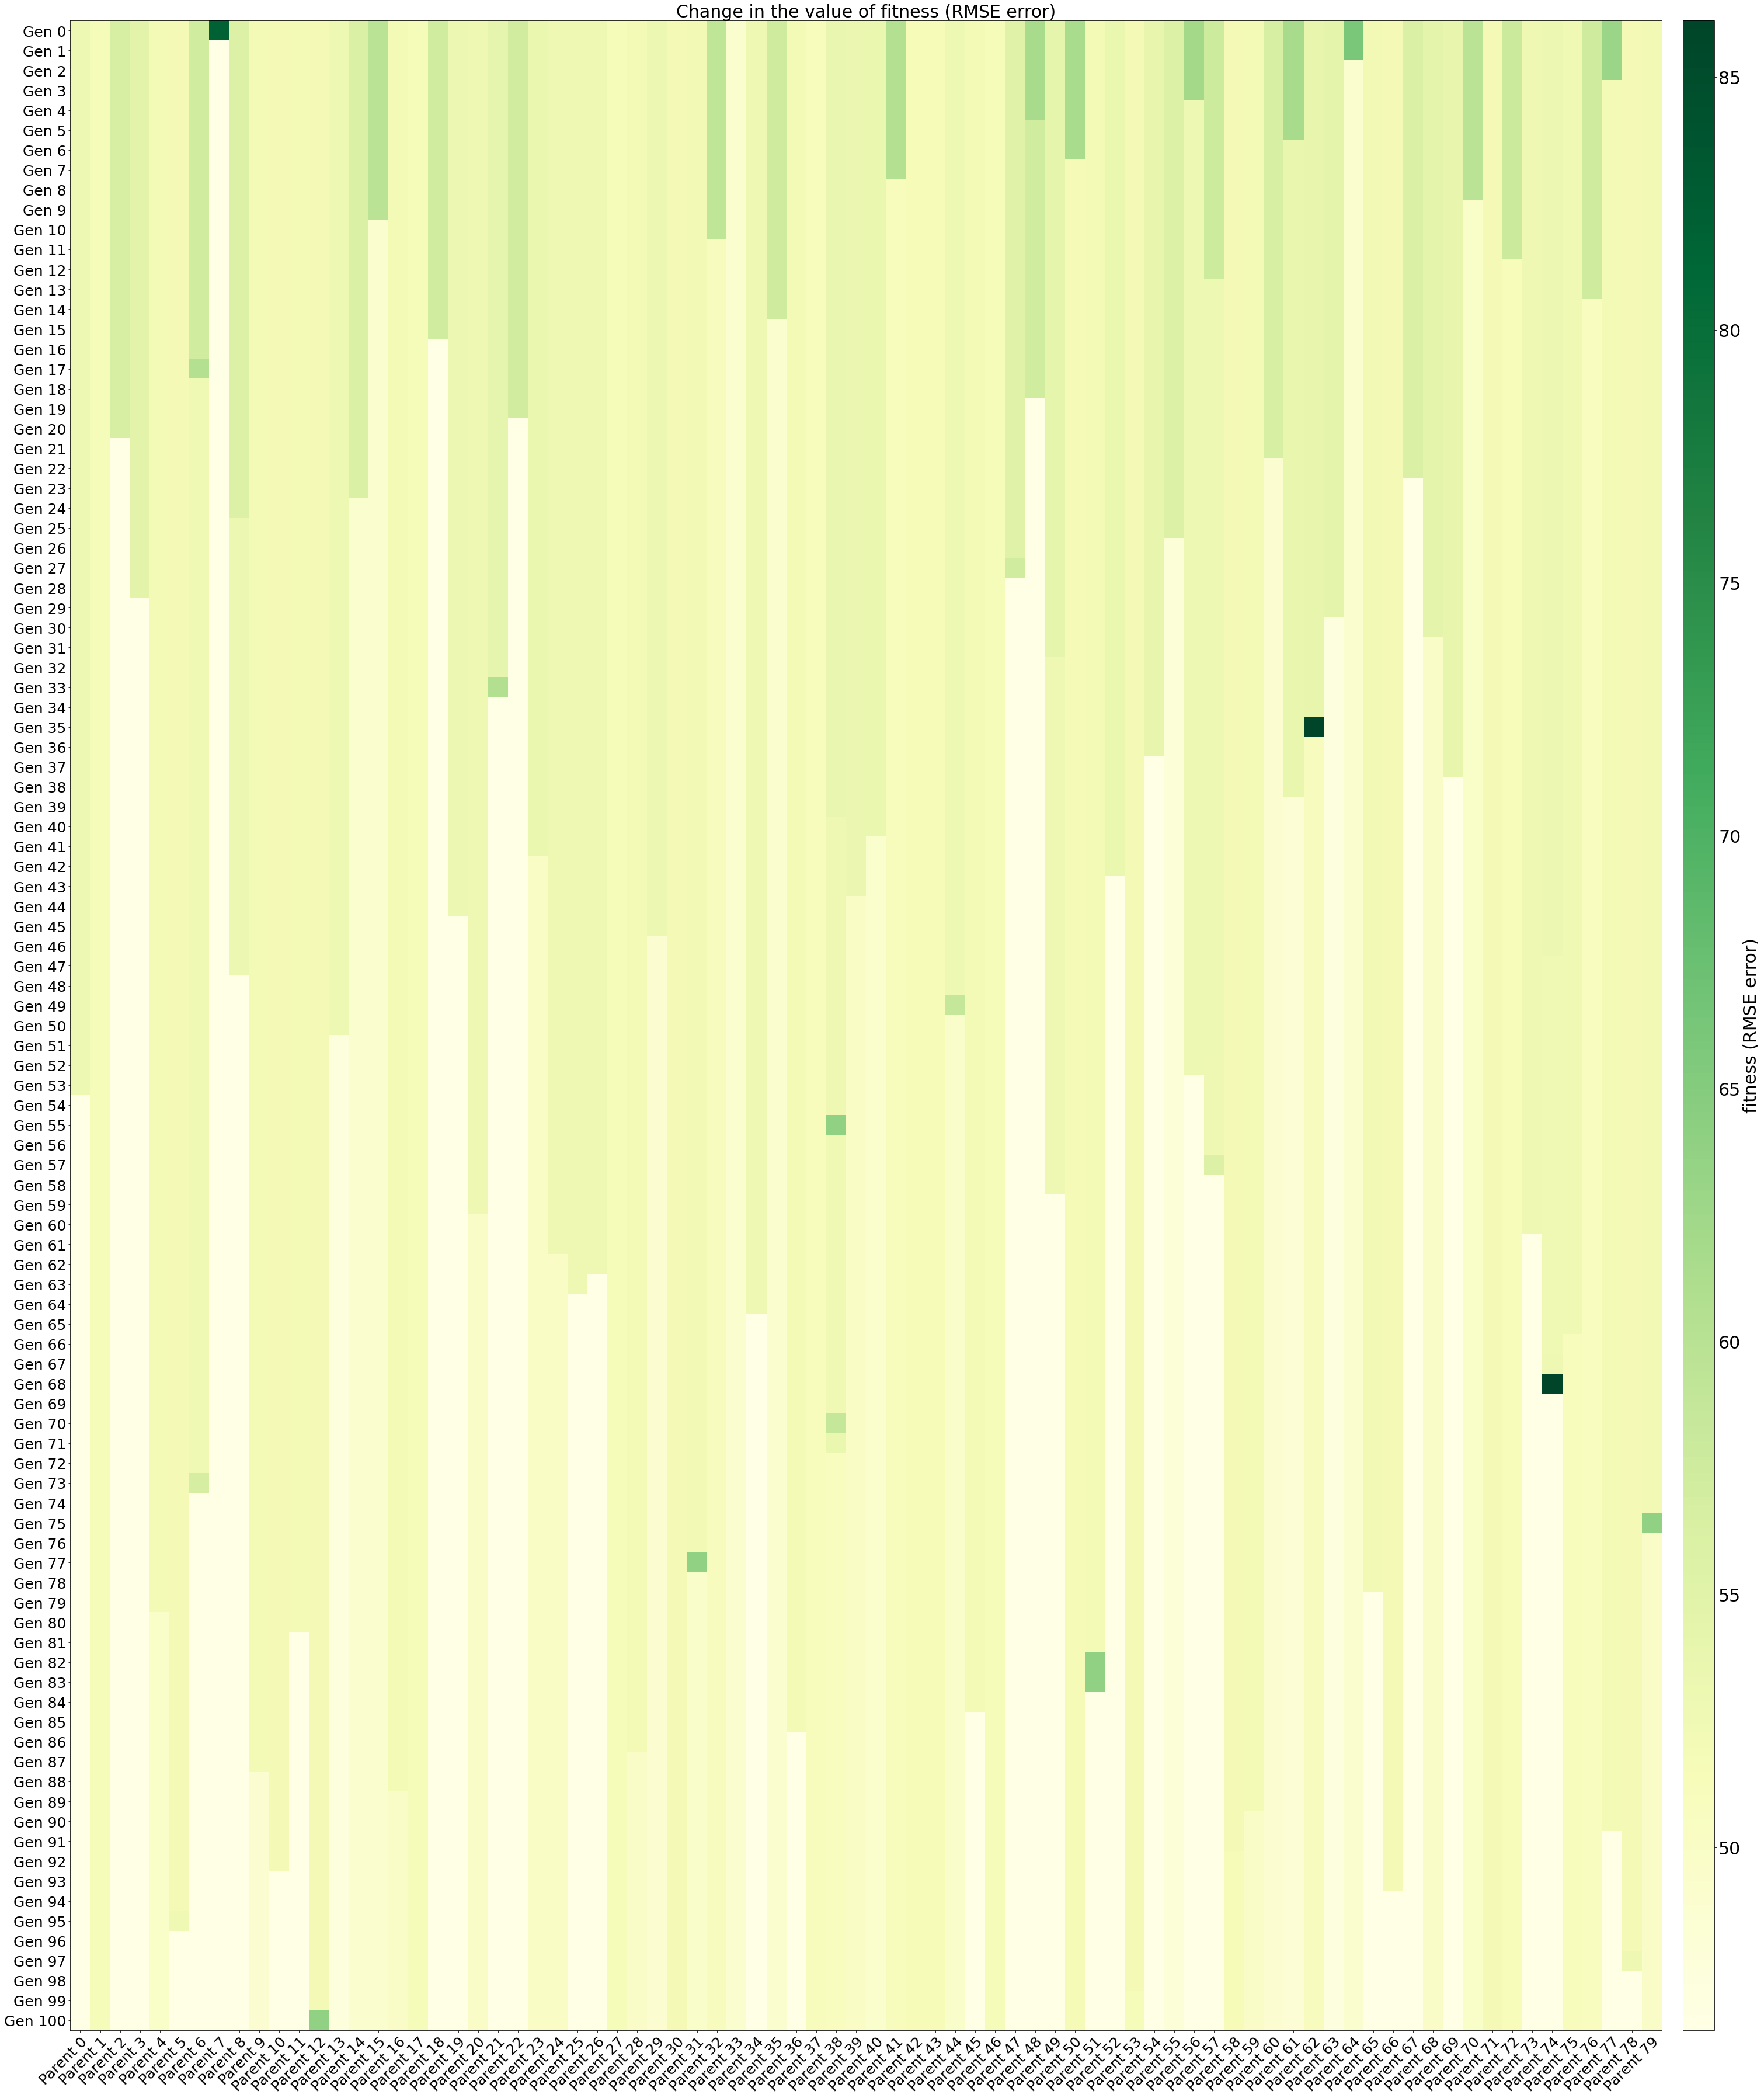

In [14]:
LSTM_Evolution.plot_parameters(numberOfGenerations, numberOfParents, fitnessHistory, "fitness (RMSE error)")

In [27]:
#Best solution from the final iteration
fitness =LSTM_Evolution.CalculateFitness(population, train_X, train_y,test_X, test_y,n_hours=5,n_features=9)
#fitnessHistory[generation+1, :] = fitness

In [28]:
#index of the best solution
bestFitnessIndex = np.where(fitness == np.min(fitness))[0][0]

#Best fitness
print("Best fitness is =", fitness[bestFitnessIndex])

Best fitness is = 83.92916062910584


In [29]:
#Best parameters
print("Best parameters are:")
print('neuron_size1 :', population[bestFitnessIndex][0])
print('layer2 :', population[bestFitnessIndex][1])
print('neuron_size2 :', population[bestFitnessIndex][2])
print('layer3 :', population[bestFitnessIndex][3])
print('neuron_size3 :', population[bestFitnessIndex][4])
print('OptionalDense :', population[bestFitnessIndex][5])
print('Dense_size :', population[bestFitnessIndex][6])
print('epochs :', population[bestFitnessIndex][7])
print('batchsize :', population[bestFitnessIndex][8])
print('OptionalDropoutLayer :', population[bestFitnessIndex][9])

Best parameters are:
neuron_size1 : 16
layer2 : 1
neuron_size2 : 100
layer3 : 1
neuron_size3 : 100
OptionalDense : 0
Dense_size : 10
epochs : 120
batchsize : 32
OptionalDropoutLayer : 1
